<a href="https://colab.research.google.com/github/andresvillamayor/BigData-Pro/blob/main/BigData_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de Big Data 
Andrés Villamayor 
Universidad Comunera

In [99]:
#importando librerias
import pandas as pd 
from  google.colab import drive 

In [100]:
drive.mount("/content/drive")
#montar mi drive para los archivos 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
data = pd.read_csv("/content/drive/My Drive/UCOM-BIGDATA/datatweet-07112020-v3.csv", sep="," , engine="python")

In [102]:
data.head()

,id,texto,Fecha,retweet,favorite,dispositivo,codigo_usuario,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario
0,1325064162855301125,#CoronavirusPy. Desde la XI Región Sanitaria c...,2020-11-07 13:14:49,0,1,Twitter Web App,166275230,LaNacionPy,Diario La Nación,2010-07-13 19:22:08,"Información, análisis y opinión hace 25 años.\...",325307,438,Paraguay
1,1325063936866201600,Salud reporta fallecimiento de menor de un año...,2020-11-07 13:13:55,0,0,Twitter for Android,3005586707,evcrojas,ENCARO🇵🇾📈💻🖥🎬⚽️,2015-01-30 13:40:55,"Catedrático-Consultor en Negocios, Economía y ...",3428,1310,Asunción del Paraguay
2,1325061751289819136,RT @UNO650AM: Reportan muerte de un bebé de me...,2020-11-07 13:05:14,1,0,Twitter for Android,2491213810,rolon_lidia03,lidia concepcion,2014-04-18 03:27:54,NaN,869,389,NaN
3,1325060982247464961,RT @trecepy: ▪️ El ministerio de Salud reportó...,2020-11-07 13:02:11,5,0,Twitter for Android,2491213810,rolon_lidia03,lidia concepcion,2014-04-18 03:27:54,NaN,869,389,NaN
4,1325056628752867332,RT @Unicanal: 😢Un bebé de menos de 1 año fue v...,2020-11-07 12:44:53,4,0,Twitter for iPhone,1239988100409024514,ninnalezz,🌙☁️,2020-03-17 18:53:01,could you tell me what’s real?,98,89,NaN


In [103]:
#usar el texto para (ver el corpus para el analisis de sentimiento)
#importamos la libreria NLTK ( Natural Lenguage Tool Kit)
import nltk
#nltk.download('stopwords') # ya se importo la libreria
#nltk.download('punkt') # ya se importo la libreria

In [104]:
#importa la libreria de soptwords de nltk 
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('spanish')

In [105]:
# datos de parada - verificacion que este en español 
print(stoplist)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [106]:
# creamos un data frame solo con el texto 
datatexto =  data['texto']
datatexto.head()

0    #CoronavirusPy. Desde la XI Región Sanitaria c...
1    Salud reporta fallecimiento de menor de un año...
2    RT @UNO650AM: Reportan muerte de un bebé de me...
3    RT @trecepy: ▪️ El ministerio de Salud reportó...
4    RT @Unicanal: 😢Un bebé de menos de 1 año fue v...
Name: texto, dtype: object

In [107]:
#funcion de limpiar el texto 
#librerias
from string import punctuation
from nltk import word_tokenize

def limpiar_texto (text):
    non_words = list(punctuation)
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    return tokens

In [108]:
#crear una funcion 
#tokenizar los datos 
spanish_stopwords = stopwords.words('spanish')
def valor_token(tokens):
  vector_texto = []
  #normalizacion del texto 
  tokens = [w.lower() for w in tokens]
  tokens =  [w for w in tokens if not w in spanish_stopwords]
  for item in tokens:
        vector_texto.append((item))  
  return vector_texto

In [109]:
# Analizar sentimiento del corpus 
#!pip install spanish-sentiment-analysis
#Libreria de Analisis de Sentimiento  https://pypi.org/project/spanish-sentiment-analysis   ( creado por Elliot Hofman 2018)
from classifier import SentimentClassifier
#crear una funcion 
def analizar(cadena_texto):
  clf = SentimentClassifier()
  valor = clf.predict(cadena_texto)
  #print (cadena_texto,valor) 
  return valor

In [ ]:
resultado_valor=[]
for tweet in datatexto:
  datos_limpios = limpiar_texto(tweet)
  datos_tokenizados = valor_token (datos_limpios)
  #print(datos_tokenizados)
  cadena_valor = ' '.join([str(elem) for elem in datos_tokenizados])
  #print (cadena_valor)
  #analizar sentimiento del corpus 
  valor = analizar(cadena_valor)
  resultado_valor.append(valor)  
  #print (resultado_valor)

#agregar al data frame original el valor del Analisis del Corpus 
print ('======================== Fin del proceso de Analisis ==================')


In [16]:
#Se agrega la columan Pre = Prediccion del Analisis de Sentimiento al Data Frame original "data"
data['Pre'] = resultado_valor
#impimir data frame 
data.head()

,id,texto,Fecha,retweet,favorite,dispositivo,codigo_usuario,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre
0,1325000220472709120,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,151214860,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333
1,1324991828588900352,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,366739674,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962
2,1324972016840151042,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,164378199,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964
3,1324955022631837697,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,77025881,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962
4,1324947182181634048,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,382748730,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962


In [17]:
#verificar los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    int64  
 1   texto                    100 non-null    object 
 2   Fecha                    100 non-null    object 
 3   retweet                  100 non-null    int64  
 4   favorite                 100 non-null    int64  
 5   dispositivo              99 non-null     object 
 6   codigo_usuario           100 non-null    int64  
 7   alias_de_usuario         100 non-null    object 
 8   nombre_usuario           100 non-null    object 
 9   fecha_de_usuario         100 non-null    object 
 10  descripcion_del_usuario  89 non-null     object 
 11  seguidores_de_usuario    100 non-null    int64  
 12  amigos_de_usuario        100 non-null    int64  
 13  origen_usuario           79 non-null     object 
 14  Pre                      10

Verificar los Datos para normalizacion 
Uso de Lablel Encoder 
Eliminacion de Columnas que no aportan 


In [18]:
# Revision de los datos 
# Borrar los campos de id 
# Borrar el codigo de usuario  se tiene su nombre y su alias 
data.drop(['id','codigo_usuario'],axis = 'columns',inplace = True)
data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962


In [21]:
#cacular hace cuanto tiempo usa twitter el usuario 
#libreria 
import numpy as np
#
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['fecha_de_usuario'] = pd.to_datetime(data['fecha_de_usuario'])
data['Tiempo'] = ((data['Fecha']-data['fecha_de_usuario'])/np.timedelta64(1,'Y')).astype(int)
data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333,10
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962,9
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964,10
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962,11
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962,9


In [44]:
#Uso de Lablel Encoder 
#importamos libreria 
from sklearn import preprocessing

#codificacion
#dispositivo 
leDispositivo  = preprocessing.LabelEncoder()
data['dispositivo'] = leDispositivo.fit_transform(data['dispositivo'].astype(str))
#origen usuario
leOrigen_usuario  = preprocessing.LabelEncoder()
data['origen_usuario'] = leOrigen_usuario.fit_transform(data['origen_usuario'].astype(str))

leAliasdeusuario = preprocessing.LabelEncoder()
data['alias_de_usuario'] = leAliasdeusuario.fit_transform(data['alias_de_usuario'].astype(str))

data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo,Final
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,6,38,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,27,0.541333,10,1
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,5,48,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,17,0.403962,9,0
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,5,23,AROLITO,2010-07-08 18:45:13,NaN,155,933,0,0.493964,10,0
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,6,71,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,19,0.403962,11,0
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,5,5,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,28,0.403962,9,0


In [56]:
# verificar la inversa del Label Encoder
leDispositivo.inverse_transform(data['dispositivo'])  


array(['6', '5', '5', '6', '5', '5', '6', '6', '5', '5', '5', '5', '4',
       '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '6', '5',
       '5', '5', '5', '5', '5', '6', '5', '5', '5', '5', '5', '6', '4',
       '5', '5', '5', '5', '5', '5', '7', '4', '5', '1', '5', '6', '5',
       '4', '5', '5', '4', '6', '4', '5', '4', '1', '4', '4', '6', '5',
       '6', '4', '5', '5', '4', '4', '5', '1', '1', '5', '4', '5', '0',
       '5', '5', '6', '5', '4', '5', '5', '5', '3', '1', '6', '4', '4',
       '5', '3', '5', '5', '5', '2', '5', '5', '5'], dtype=object)

In [46]:
# Colocar los valores Buenos y Malos dentro del Data Frame 
# Dependiendo del valor de Pre
final = []
#Valor 0 =  Sentimiento NEGATIVO
#Valor 1 =  Sentimiento POSITIVO
for resultado in  data['Pre']:
  if resultado <= 0.5:
    x = 'POSITIVO'
    final.append(x)
  else:
    x = 'NEGATIVO'
    final.append(x)

#Agregamos la columna Target al Data Frame 
data['Final'] = final
data

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo,Final
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,6,38,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,27,0.541333,10,1
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,5,48,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,17,0.403962,9,0
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,5,23,AROLITO,2010-07-08 18:45:13,NaN,155,933,0,0.493964,10,0
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,6,71,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,19,0.403962,11,0
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,5,5,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,28,0.403962,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RT @LaNacionPy: Los italianos tendrán que resp...,2020-11-06 22:20:15,8,0,5,64,Max Power🇵🇾,2010-05-07 02:39:29,Si te vienen a contar cositas malas de mi dil...,114,1458,14,0.739599,10,1
96,"""El mundo entero"" se abrió para Lisett cuando ...",2020-11-06 22:17:35,1,6,2,10,Diario La Nación,2010-07-13 19:22:08,"Información, análisis y opinión hace 25 años.\...",325302,438,5,0.769007,10,1
97,RT @eltruenopy: 📍La meseta de casos positivos ...,2020-11-06 22:12:21,3,0,5,3,𝑹𝒐𝒅𝒐𝒍𝒇𝒐 𝑮𝒐𝒏𝒛á𝒍𝒆𝒛 𝑯. 2️⃣3️⃣,2010-10-05 17:00:35,"𝑷𝒂𝒓𝒂𝒈𝒖𝒂𝒚𝒐, 𝑺𝒂𝒏𝑴𝒊𝒈𝒖𝒆𝒍𝒊𝒏𝒐 𝒚 𝑶𝒍𝒊𝒎𝒑𝒊𝒔𝒕𝒂. 𝑷𝒆𝒓𝒊𝒐𝒅𝒊𝒔𝒕...",9628,1484,5,0.354593,10,0
98,RT @LaNacionPy: Los italianos tendrán que resp...,2020-11-06 22:11:58,8,0,5,9,KDIRRA,2015-05-20 04:24:49,Rodéate siempre de personas que te van a desaf...,506,3220,1,0.739599,5,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   texto                    100 non-null    object        
 1   Fecha                    100 non-null    datetime64[ns]
 2   retweet                  100 non-null    int64         
 3   favorite                 100 non-null    int64         
 4   dispositivo              100 non-null    int64         
 5   alias_de_usuario         100 non-null    object        
 6   nombre_usuario           100 non-null    object        
 7   fecha_de_usuario         100 non-null    datetime64[ns]
 8   descripcion_del_usuario  89 non-null     object        
 9   seguidores_de_usuario    100 non-null    int64         
 10  amigos_de_usuario        100 non-null    int64         
 11  origen_usuario           100 non-null    int64         
 12  Pre                      100 non-null

kMeans  - Cluster Model

In [58]:
#librerias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import  preprocessing
#seleccion de datos 

df = data [['retweet','favorite','dispositivo','seguidores_de_usuario','amigos_de_usuario','Tiempo','Final']]
#df1 = data.iloc[:,2:3] #retweet
#df2 = data.iloc[:,3:4] #favorito
#df3 = data.iloc[:,4:5] #dispositivo
#df4 = data.iloc[:,9:10] #seguidores 
#df5 = data.iloc[:,10:11] # amigos 
#df6 = data.iloc[:,13:14] # Tiempo de que usa Twitter
#df7 = data.iloc[:,14:15] # Target
#df = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   retweet                100 non-null    int64
 1   favorite               100 non-null    int64
 2   dispositivo            100 non-null    int64
 3   seguidores_de_usuario  100 non-null    int64
 4   amigos_de_usuario      100 non-null    int64
 5   Tiempo                 100 non-null    int64
 6   Final                  100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB


In [66]:
# One hot encoding para las variables 
#x = pd.get_dummies(df)
#print (x) 

In [67]:
#Normalizacion  de datos [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(x.values))
xNorm.head()

,0,1,2,3,4,5,6
0,0.070175,0.000000,0.857143,0.002530,0.156971,0.909091,1.0
1,0.035088,0.000000,0.714286,0.000202,0.035533,0.818182,0.0
2,0.245614,0.000000,0.714286,0.000150,0.078443,0.909091,0.0
3,0.035088,0.000000,0.857143,0.004877,0.150611,1.000000,0.0
4,0.035088,0.076923,0.714286,0.007167,0.076069,0.818182,0.0


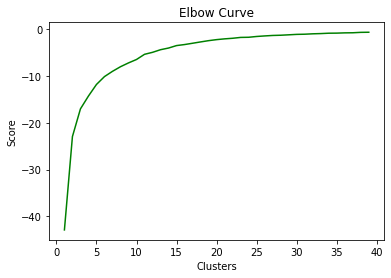

In [73]:
#Curva de Elbow 
nc = range(1, 40)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]
#impresion de la Curva 
plt.plot(nc, score, color='green') 
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [88]:
#Modelo 
kmeans = KMeans(n_clusters=35, max_iter=300, random_state=1)
kmeans.fit(xNorm)
print("Score: " + str(kmeans.score(xNorm)))
print(kmeans.labels_)
#print(kmeans.cluster_centers_)
clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=x.columns)
clusters['dispositivo'] = clusters['dispositivo'].round()
clusters['Tiempo'] = clusters['Tiempo'].round()
clusters['Final'] = clusters['Final'].round()
#clusters
df_svm = pd.DataFrame(clusters)
print(df_svm)

Score: -0.8431518245840958
[24  1  1 28  1 30 28  0 21 30 17 16  3 10 26 16  2 30 29  0  1 31  8  3
 24  3  8 21  8  3  8 28  8  3  8 21  8 22  7 13 11 17 14 17  0 33 18 21
 19  1 22 21  6 13 20 29 28  2  0 25  4 32 17 28 12  1 17  1  1  5 17 21
  4  4 17  2 27  9 17 22 24 21 32 26 22 12  6 34 26 12  2 26 23 12 26  0
 15 21 14 17]
      retweet      favorite  dispositivo  ...  amigos_de_usuario  Tiempo  Final
0    5.400000  0.000000e+00          5.0  ...         870.600000    10.0    1.0
1    6.500000  2.500000e-01          5.0  ...         550.000000     9.0    0.0
2    1.500000  1.250000e+00          4.0  ...         606.500000     0.0    0.0
3    5.200000  0.000000e+00          5.0  ...         272.400000     5.0    1.0
4    1.333333  3.333333e-01          1.0  ...         387.000000    10.0    0.0
5    7.000000  2.500000e+01          4.0  ...         258.000000    11.0    0.0
6    1.500000  2.500000e+00          4.0  ...        5718.000000    10.0    0.0
7    6.000000  2.600000e+01

In [84]:
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retweet                35 non-null     float64
 1   favorite               35 non-null     float64
 2   dispositivo            35 non-null     float64
 3   seguidores_de_usuario  35 non-null     float64
 4   amigos_de_usuario      35 non-null     float64
 5   Tiempo                 35 non-null     float64
 6   Final                  35 non-null     float64
dtypes: float64(7)
memory usage: 2.0 KB


Utilizando SVM MODEL  

In [93]:
#libreria 
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

y = df_svm['Final'] # Positivo = 1  //  Negativo = 0
X = df_svm.iloc[:,0:5]

In [95]:
# Split en train y test  ( se toma los datos de la misma semilla - random_state = 1 , el 30 % de los datos son para entrenamiento test_size = 0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state = 1)

# Normalizacion a [0-1]
#min_max_scaler_train = preprocessing.MinMaxScaler()
#xNormTrain = pd.DataFrame(min_max_scaler_train.fit_transform(X_train.values))
#min_max_scaler_test = preprocessing.MinMaxScaler()
#xNormTest = pd.DataFrame(min_max_scaler_test.fit_transform(X_test.values))
#print (X_train.values)
#print (X_test.values)

#Ceracion de Clasificacion SVM 
clf = svm.SVC(kernel='rbf', max_iter=2000, probability=1) # kernel={linear, rbf, poly, sigmoid}
#Train the model using the training sets
clf.fit(X_train, y_train)

#Y Predicho 
y_pred = clf.predict(X_test)

print("\nTrain Score:",clf.score(X_train, y_train))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred, average=None)


Train Score: 0.7083333333333334

Accuracy: 0.5454545454545454


(array([0.54545455, 0.        ]),
 array([1., 0.]),
 array([0.70588235, 0.        ]),
 array([6, 5]))

In [96]:
# Calcular matriz de confusion
pd.crosstab(y_test, y_pred, 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total")

pred,0.0
actual,
0.0,6
1.0,5


In [98]:
# Obtener scores de clasificación en las clases 0 o 1
y_scores = clf.predict_proba(X_test)

# Crear dataframe de predicciones con scores
dp = pd.DataFrame(zip(y_test,y_pred,y_scores[:,0],y_scores[:,1]), columns=['actual','pred','prob_yes','prob_no'])
dp

,actual,pred,prob_yes,prob_no
0,1.0,0.0,0.712313,0.287687
1,1.0,0.0,0.694333,0.305667
2,1.0,0.0,0.686867,0.313133
3,1.0,0.0,0.697422,0.302578
4,0.0,0.0,0.731967,0.268033
5,0.0,0.0,0.756024,0.243976
6,0.0,0.0,0.720957,0.279043
7,1.0,0.0,0.749792,0.250208
8,0.0,0.0,0.686835,0.313165
9,0.0,0.0,0.717109,0.282891


0.5


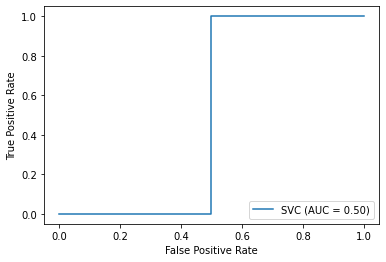

In [ ]:
# ROC Curve
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_scores[:,1]))
metrics.plot_roc_curve(clf, xNormTest, y_test)

Utilizando el kMeans Model
